In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from virga import justdoit as vdi
from astropy import units as u

In [ ]:
def run_virga_to_match_diamondback(teff, fsed, grav_ms2, gases, metallicity=1, mean_molecular_weight=2.2):
    diamondback_ptk = pd.read_csv(f"diamondback_cloud_teff_{teff}fsed_3_gravms2_316.csv")
    recommended_gases = vdi.recommend_gas(diamondback_ptk["pressure"], diamondback_ptk["temperature"], metallicity, mean_molecular_weight)
    recommended_gases = np.intersect1d(recommended_gases, gases)
    sum_planet = vdi.Atmosphere(recommended_gases,fsed=fsed,mh=metallicity, mmw = mean_molecular_weight)
    sum_planet.gravity(gravity=grav_ms2, gravity_unit=u.Unit('m/(s**2)'))
    sum_planet.ptk(df = pd.DataFrame(diamondback_ptk))
    return sum_planet.compute("~/projects/clouds/virga/refrind") # change this to path to refrind

In [4]:
fsed, grav_ms2 = 3, 316
virga_runs = {}
for teff in [900, 1400, 1900, 2400]:
    virga_runs[teff] = [
        run_virga_to_match_diamondback(teff, fsed, grav_ms2, gases) for gases in [["Fe", "MgSiO3", "Mg2SiO4", "Al2O3"]]
    ]

const
const
const
const


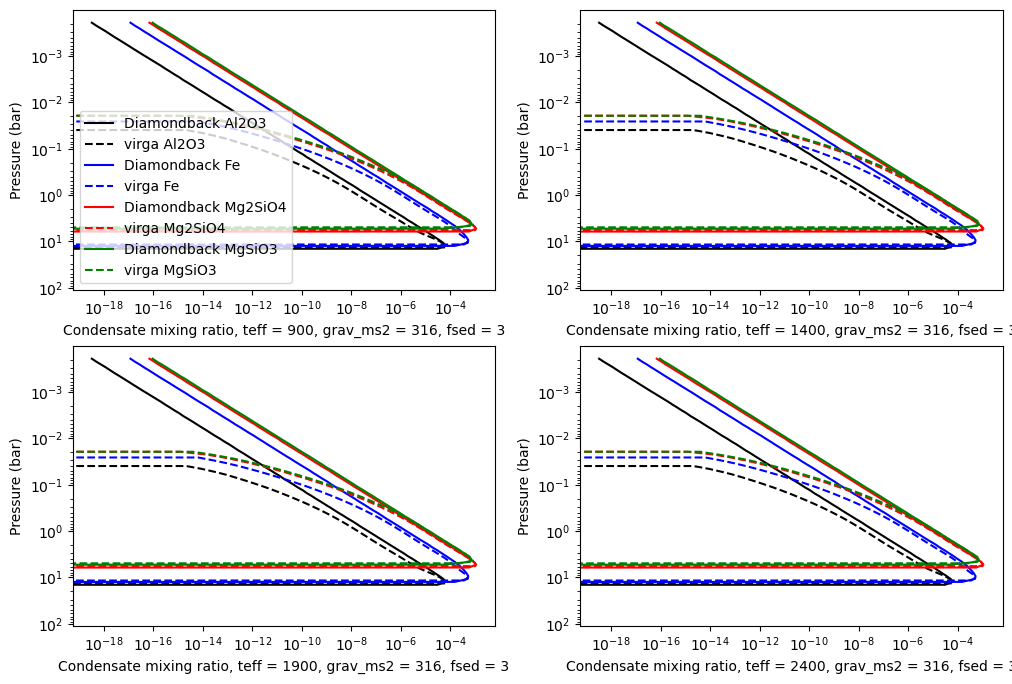

In [4]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
for (teff, ax) in zip([900, 1400, 1900, 2400], [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]):
    vrun = virga_runs[teff][0]
    dbclouds = pd.read_csv(f"diamondback_cloud_teff_{teff}fsed_3_gravms2_316.csv")
    for (i, (c, color)) in enumerate(zip(vrun["condensibles"], ["black", "blue", "red", "green"])):
        ax.loglog(dbclouds[f"{c} qc(g/g)"], dbclouds["pressure"], label=f"Diamondback {c}", color=color)
        ax.loglog(vrun["condensate_mmr"][:,i], vrun["pressure"], label=f"virga {c}", color=color, ls="--")
    ax.set_xlabel(f"Condensate mixing ratio, {teff = }, {grav_ms2 = }, {fsed = }")
    ax.set_ylabel("Pressure (bar)")
    if teff == 900:
        ax.legend()
    ax.invert_yaxis()